In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D



import sklearn


import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing


import seaborn as sns

df=pd.read_csv("H:\codes\Cse465\indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [46]:
df['Gender'].replace(['female','male'],['0','1'], inplace=True)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [47]:
import xgboost as xgb

In [72]:
X=df[['Age','Total_Bilirubin','Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase',
        'Total_Protiens', 'Albumin','Albumin_and_Globulin_Ratio']]
X=df.drop("Result",axis=1)
y=df["Result"]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.2, random_state=123)

In [75]:
train=df.loc[:,df.columns !='Result']
train_labels=df.loc[:, df.columns=='Result']

In [76]:
from feature_selector import FeatureSelector 
fs=FeatureSelector(data=train, labels=train_labels)

In [77]:
fs.identify_zero_importance(task = 'classification',
                           eval_metric='auc',
                           n_iterations= 10,
                           early_stopping=True)
zero_importance_features = fs.ops['zero_importance']                                                    

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[28]	valid_0's auc: 0.701905
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.683175
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[51]	valid_0's auc: 0.749293
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[132]	valid_0's auc: 0.735026
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[516]	valid_0's auc: 0.759195
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[87]	valid_0's auc: 0.644531
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[158]	valid_0's auc: 0.769097
Training until validation scores don't improve for 100 rounds.
Early stopp

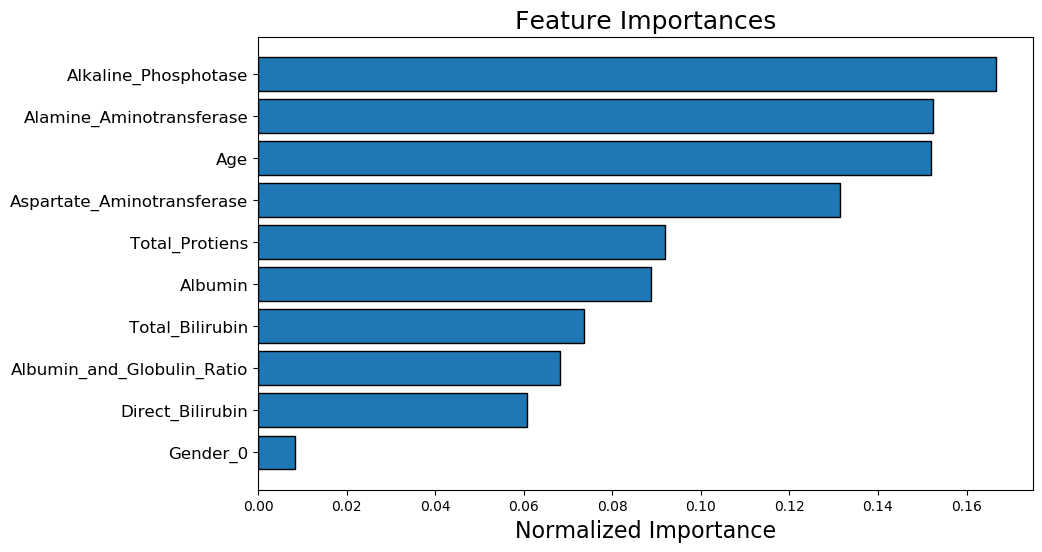

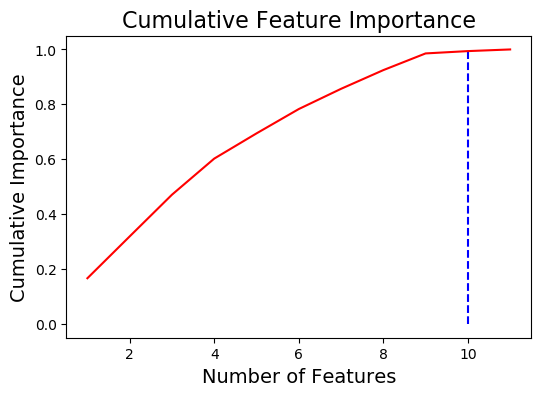

10 features required for 0.99 of cumulative importance


In [78]:
fs.plot_feature_importances(threshold= 0.99, plot_n=12)